# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

603


['tena',
 'vila do maio',
 'rikitea',
 'lazaro cardenas',
 'jamestown',
 'georgetown',
 'castro',
 'carnarvon',
 'avarua',
 'dingle',
 'sola',
 'dikson',
 'busselton',
 'husavik',
 'amderma',
 'mataura',
 'mar del plata',
 'general roca',
 'barentsburg',
 'lorengau',
 'hajnowka',
 'puerto ayora',
 'saldanha',
 'bredasdorp',
 'ushuaia',
 'hobart',
 'vaitupu',
 'faanui',
 'necochea',
 'yunjinghong',
 'albany',
 'lebu',
 'ponta do sol',
 'yulara',
 'baykit',
 'narsaq',
 'aklavik',
 'tiksi',
 'broome',
 'barrow',
 'punta arenas',
 'samusu',
 'bereda',
 'bethel',
 'king city',
 'mys shmidta',
 'vilhena',
 'milkovo',
 'vallenar',
 'taolanaro',
 'northam',
 'constitucion',
 'xichang',
 'riyadh',
 'poum',
 'atuona',
 'kodiak',
 'zaysan',
 'victoria',
 'new norfolk',
 'tabarqah',
 'clyde river',
 'komsomolskiy',
 'henties bay',
 'atar',
 'kaitangata',
 'makakilo city',
 'chongwe',
 'yellowknife',
 'puerto escondido',
 'jaisalmer',
 'adrar',
 'wanning',
 'torbay',
 'ibra',
 'verkhnyaya inta',
 '

In [9]:
print(len(cities))

603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_Speed = []
error_city = []

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        city_name.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_Speed.append(response['wind']['speed'])
    except:
        error_city.append(city)
        city_name.pop()
        #city_name.append(city)
        #cloudiness.append('')
        #country.append('')
        #date.append('')
        #humidity.append('')
        #latitude.append('')
        #longitude.append('')
        #max_temp.append('')
        #wind_Speed.append('')

print(f'Number of cities errored out: {len(error_city)}')
print(f'Number of cities : {len(city_name)}')
print(f'Number of country : {len(country)}')
print(f'Number of cities cloudiness out: {len(cloudiness)}')
print(f'Number of cities date out: {len(date)}')
print(f'Number of cities humidity out: {len(humidity)}')
print(f'Number of cities latitude out: {len(latitude)}')
print(f'Number of cities longitude out: {len(longitude)}')   
print(f'Number of cities max_temp out: {len(max_temp)}')
print(f'Number of cities wind_Speed out: {len(wind_Speed)}')


Number of cities errored out: 52
Number of cities : 551
Number of country : 551
Number of cities cloudiness out: 551
Number of cities date out: 551
Number of cities humidity out: 551
Number of cities latitude out: 551
Number of cities longitude out: 551
Number of cities max_temp out: 551
Number of cities wind_Speed out: 551


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "dingle"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
pprint(response['wind']['speed'])

#print(query_url)

6.62


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
weather_dict = {"City":city_name,"Cloudiness":cloudiness,"Country":country,"Date":date,
              "Humidity":humidity,"Latitude":latitude,"Longitude":longitude,
              "Max Temperature":max_temp,"Wind Speed":wind_Speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.index.rename('City ID', inplace=True)
weather_data.to_csv("Output Data/cities.csv")
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
City ID,,,,,,,,,
0,tena,98,EC,1615180248,84,-0.9833,-77.8167,293.65,0.85
1,vila do maio,75,CV,1615180502,72,15.1333,-23.2167,292.15,10.80
2,rikitea,100,PF,1615180502,83,-23.1203,-134.9692,299.78,8.33
3,lazaro cardenas,0,MX,1615180502,87,17.9583,-102.2000,296.21,0.72
4,jamestown,1,US,1615180502,96,42.0970,-79.2353,263.71,0.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
weather_data_humid = weather_data.loc[weather_data['Humidity'] > 100,:]
weather_data_humid.count()

City               0
Cloudiness         0
Country            0
Date               0
Humidity           0
Latitude           0
Longitude          0
Max Temperature    0
Wind Speed         0
dtype: int64

`weather_data` dataframe does not have any city with humidity over 100%. Hence skipping this part.

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

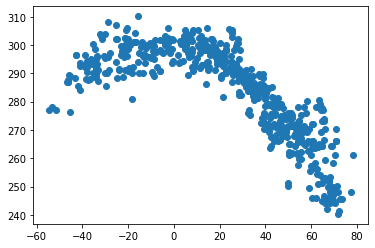

In [111]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']

fig1,ax1 = plt.subplots()
ax1.scatter(x_values,y_values,marker = 'o')
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression